## Textrue based stamp remover without OCR

Gray (2090, 3939)


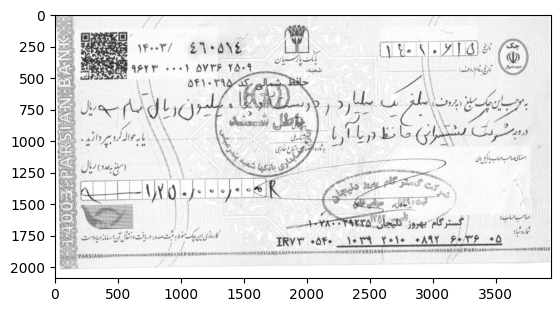

Thresh 201.0


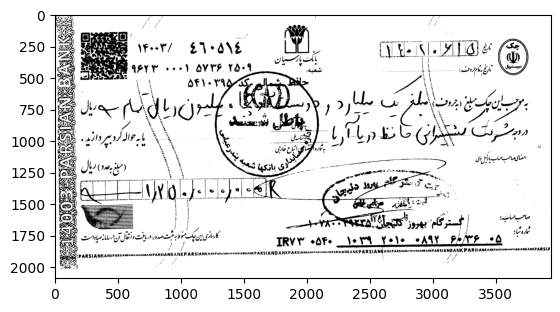

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7
141639


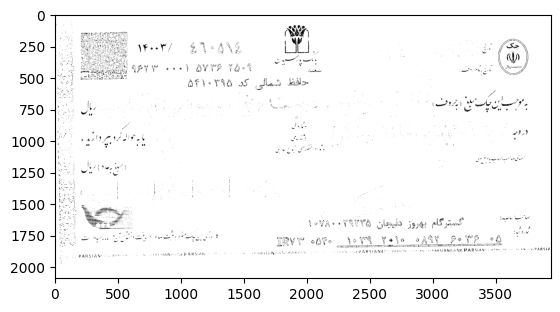

218097


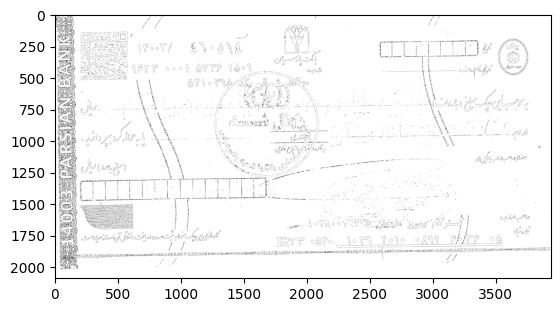

94586


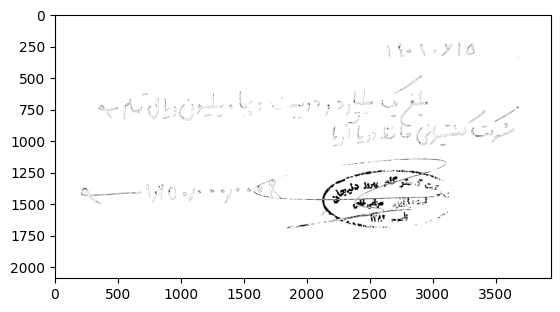

87384


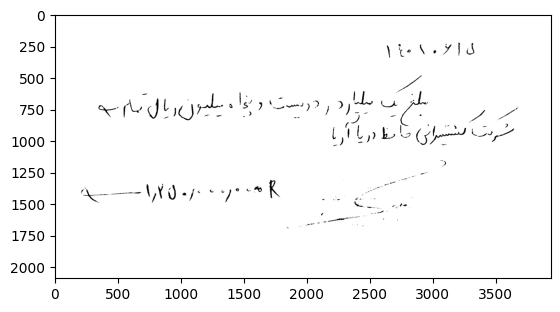

Edged


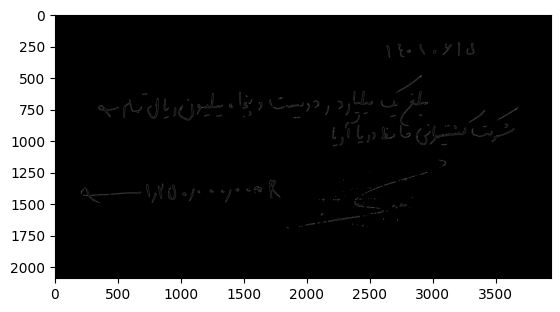

Dilated


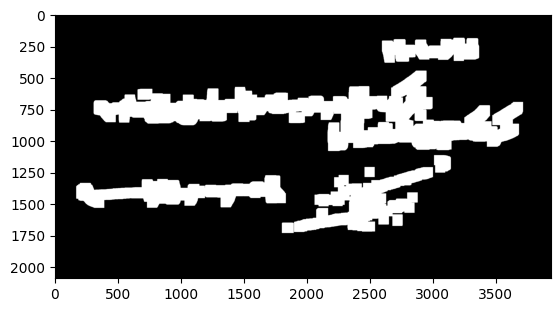

Closed


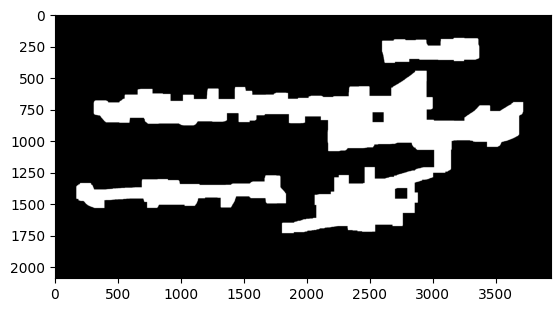

Final Image


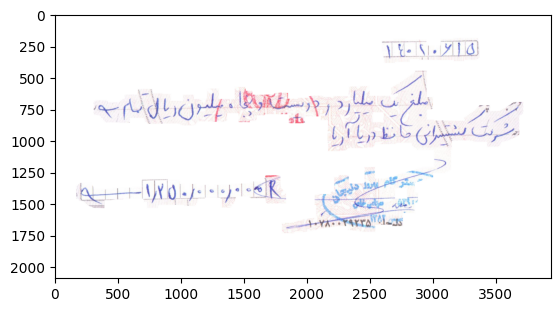

84449


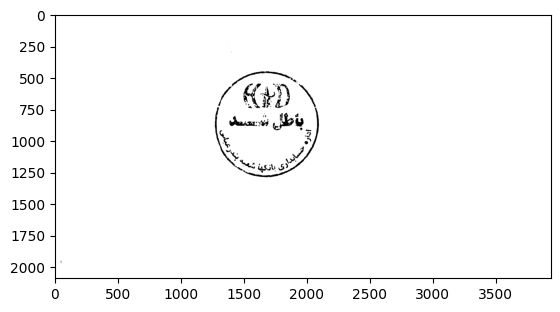

172328


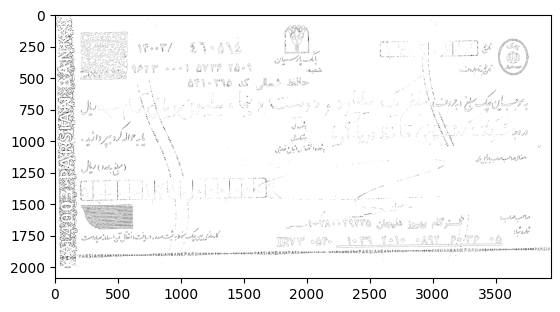

106142


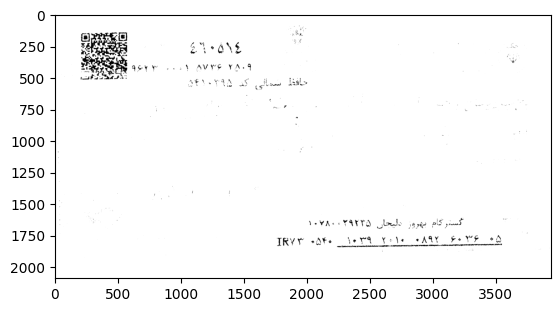

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def make_border(imm, border=10):
    imm[:border, :] = 0
    imm[-border:, :] = 0
    imm[:, :border] = 0
    imm[:, -border:] = 0

def cluster_image(image, thresh, n_clusters=7):
    pixel_colors = image[thresh == 0, ...] / 255
    pixel_locs = (np.argwhere(thresh == 0) / thresh.shape[:2]) - 0.5
    pixels = np.hstack((pixel_colors, pixel_locs / 200))  # color is 2 times more important than location
    pixels = pixels.reshape(-1, pixels.shape[-1])
    clt = KMeans(n_clusters=n_clusters)  # AgglomerativeClustering(n_clusters=n_clusters) # DBSCAN(n_jobs=-1)
    clt.fit(pixels)
    result = []
    for lab in np.unique(clt.labels_):
        clust = np.ones(shape=image.shape[:2]) * 255
        clust[thresh == 0] = (clt.labels_ != lab) * 255
        result.append(clust.astype(np.uint8))
    return result

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    print('Gray', gray.shape)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # Split image into background and object using Otsu’s Binarization
    threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if threshold_value < 200:
        threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    print('Thresh', threshold_value)
    plt.imshow(thresh, cmap='gray')
    plt.show()

    # Cluster the image
    clusters = cluster_image(cv2.cvtColor(image, cv2.COLOR_RGB2LAB), thresh, n_clusters=7)
    print(len(clusters))

    for i, c in enumerate(clusters):
        print((c == 0).sum())
        plt.imshow(c, cmap='gray')
        plt.show()

        # Process selected cluster
        if i == 3:
            # Edge detection
            edged = cv2.Canny(c, 10, 250)
            make_border(edged)
            print('Edged')
            plt.imshow(edged, cmap='gray')
            plt.show()

            # Dilation
            kernel_size = max(image.shape) // 50
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
            dilation = cv2.dilate(edged, kernel, iterations=1)
            make_border(dilation)
            print('Dilated')
            plt.imshow(dilation, cmap='gray')
            plt.show()

            # Closing
            closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
            make_border(closing)
            print('Closed')
            plt.imshow(closing, cmap='gray')
            plt.show()

            # Create a mask from the cluster
            mask = closing == 0

            # Apply the mask to the original image
            final_image = image.copy()
            final_image[mask] = [255, 255, 255]  # Set background color to white

            print('Final Image')
            plt.imshow(final_image)
            plt.show()

# Run the process on an image file
process_image('/content/checkk2.jpg')


Gray (2073, 3984)


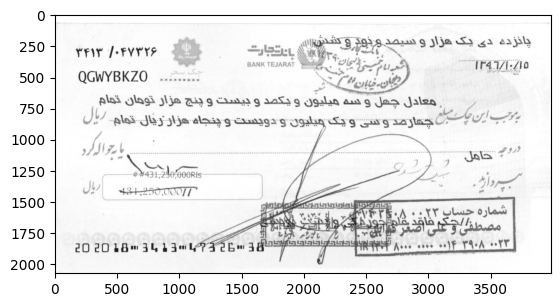

Thresh 200.0


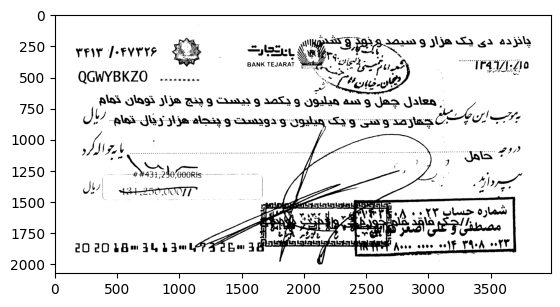

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7
166249


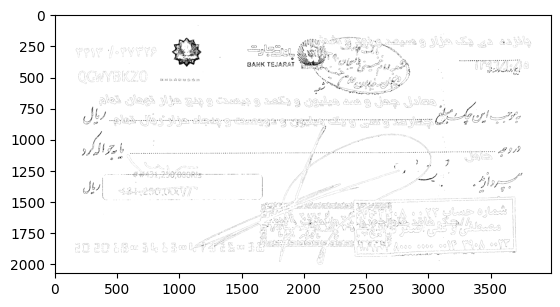

134009


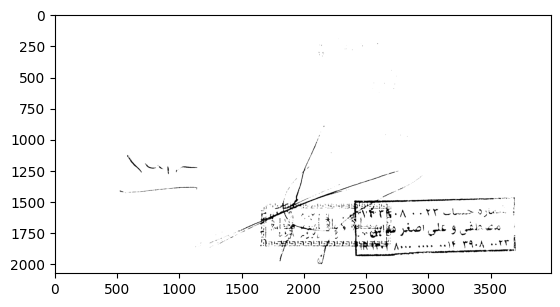

109555


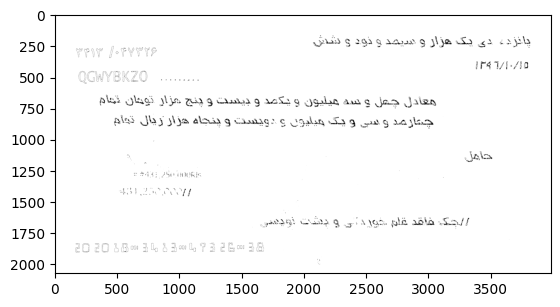

92077


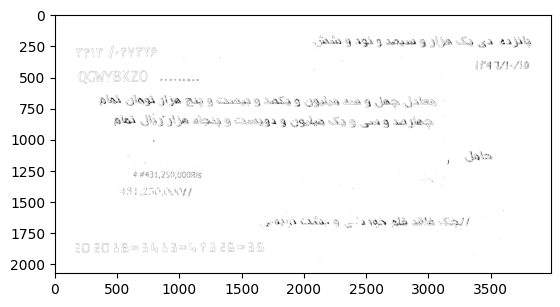

Edged


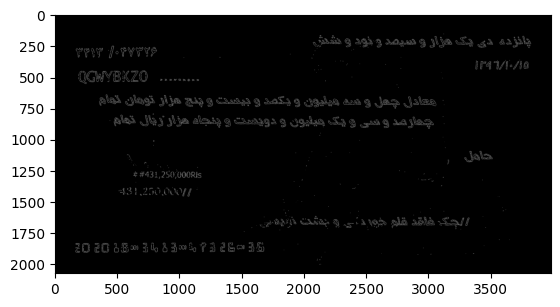

Dilated


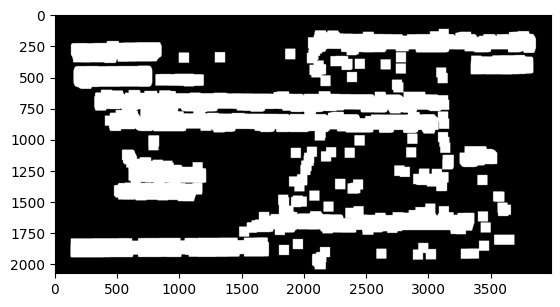

Closed


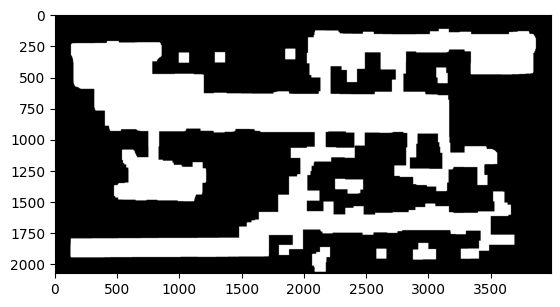

Final Image


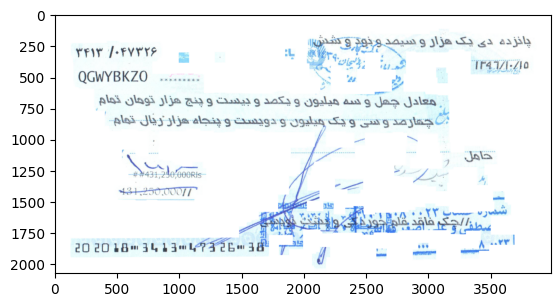

127308


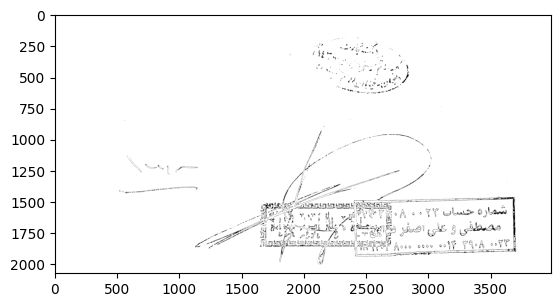

67676


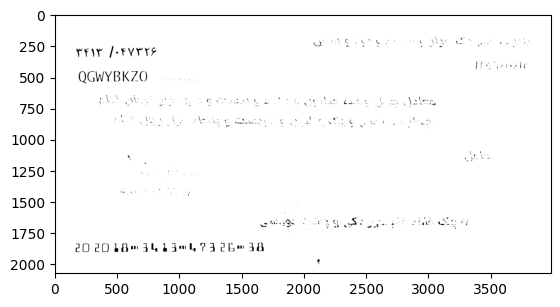

145481


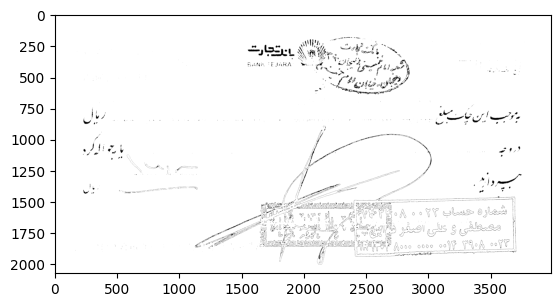

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def make_border(imm, border=10):
    imm[:border, :] = 0
    imm[-border:, :] = 0
    imm[:, :border] = 0
    imm[:, -border:] = 0

def cluster_image(image, thresh, n_clusters=7):
    pixel_colors = image[thresh == 0, ...] / 255
    pixel_locs = (np.argwhere(thresh == 0) / thresh.shape[:2]) - 0.5
    pixels = np.hstack((pixel_colors, pixel_locs / 200))  # color is 2 times more important than location
    pixels = pixels.reshape(-1, pixels.shape[-1])
    clt = KMeans(n_clusters=n_clusters)  # AgglomerativeClustering(n_clusters=n_clusters) # DBSCAN(n_jobs=-1)
    clt.fit(pixels)
    result = []
    for lab in np.unique(clt.labels_):
        clust = np.ones(shape=image.shape[:2]) * 255
        clust[thresh == 0] = (clt.labels_ != lab) * 255
        result.append(clust.astype(np.uint8))
    return result

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    print('Gray', gray.shape)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # Split image into background and object using Otsu’s Binarization
    threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if threshold_value < 200:
        threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    print('Thresh', threshold_value)
    plt.imshow(thresh, cmap='gray')
    plt.show()

    # Cluster the image
    clusters = cluster_image(cv2.cvtColor(image, cv2.COLOR_RGB2LAB), thresh, n_clusters=7)
    print(len(clusters))

    for i, c in enumerate(clusters):
        print((c == 0).sum())
        plt.imshow(c, cmap='gray')
        plt.show()

        # Process selected cluster
        if i == 3:
            # Edge detection
            edged = cv2.Canny(c, 10, 250)
            make_border(edged)
            print('Edged')
            plt.imshow(edged, cmap='gray')
            plt.show()

            # Dilation
            kernel_size = max(image.shape) // 50
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
            dilation = cv2.dilate(edged, kernel, iterations=1)
            make_border(dilation)
            print('Dilated')
            plt.imshow(dilation, cmap='gray')
            plt.show()

            # Closing
            closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
            make_border(closing)
            print('Closed')
            plt.imshow(closing, cmap='gray')
            plt.show()

            # Create a mask from the cluster
            mask = closing == 0

            # Apply the mask to the original image
            final_image = image.copy()
            final_image[mask] = [255, 255, 255]  # Set background color to white

            print('Final Image')
            plt.imshow(final_image)
            plt.show()

# Run the process on an image file
process_image('/content/checkk.jpg')


Gray (515, 968)


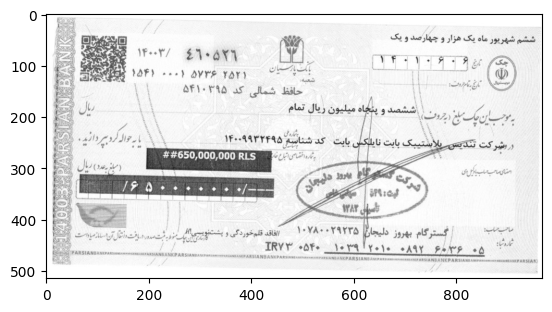

Thresh 200.0


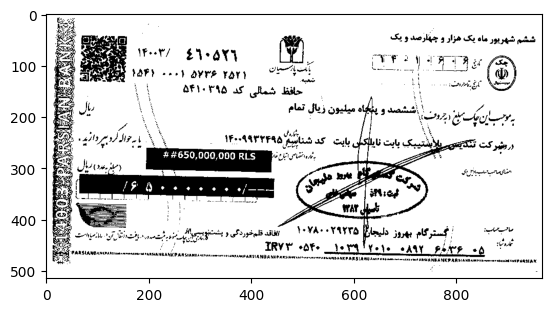

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7
10306


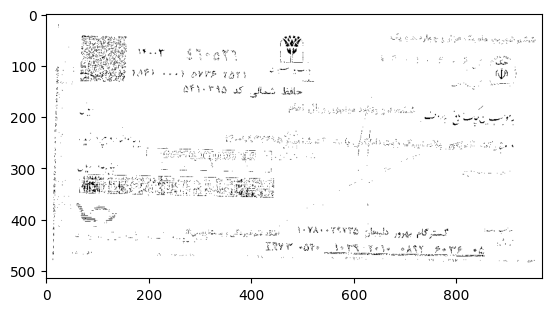

9961


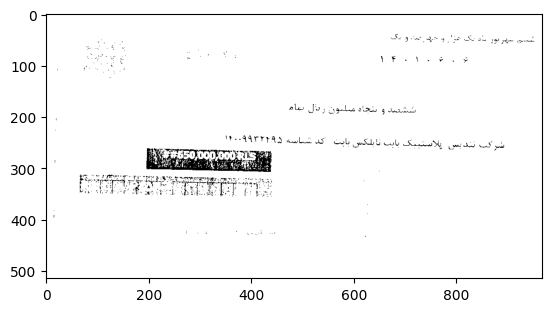

4096


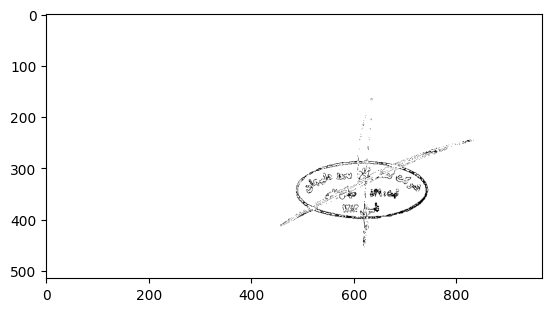

16505


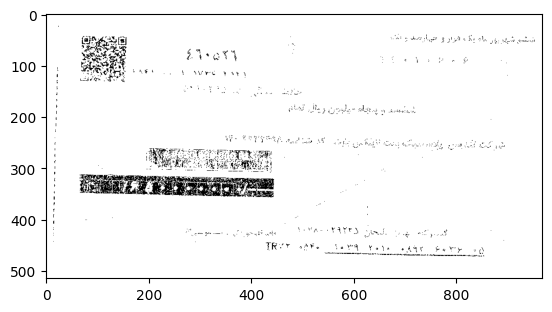

Edged


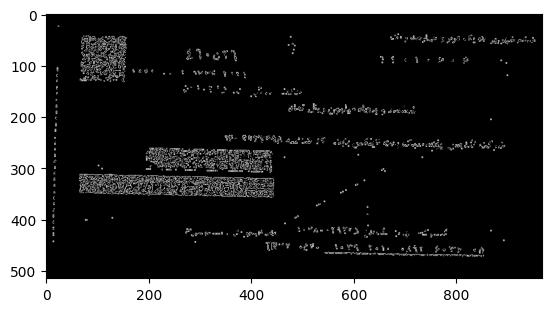

Dilated


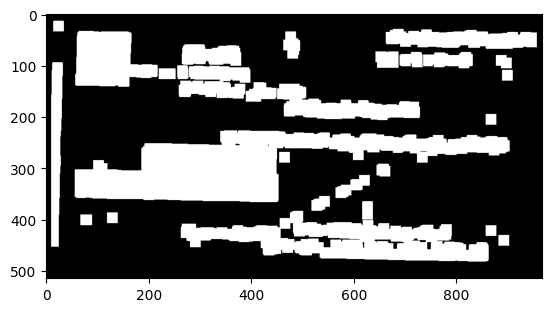

Closed


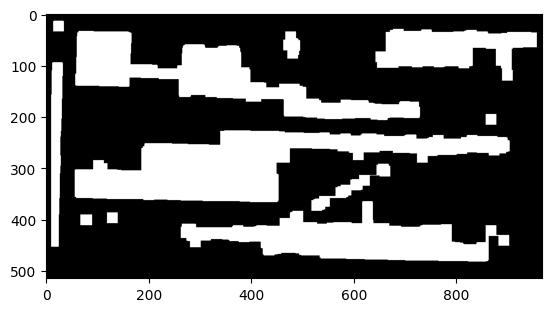

Final Image


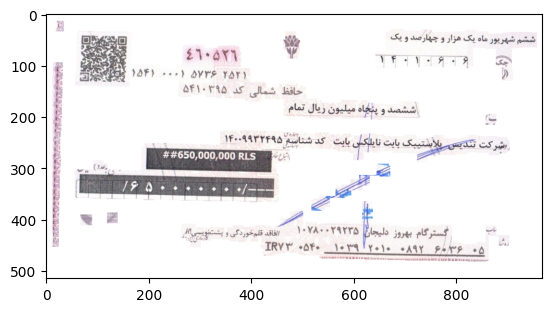

12246


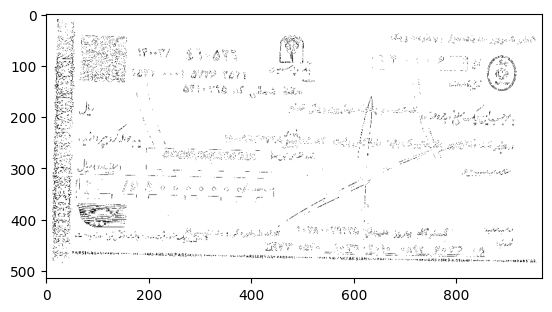

16438


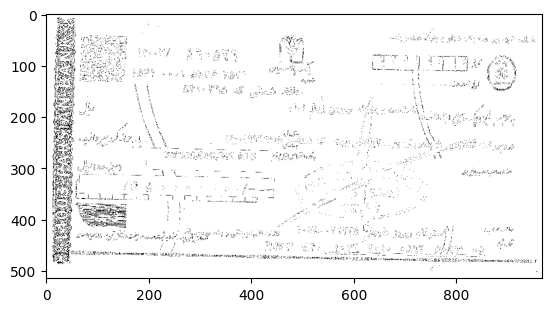

4334


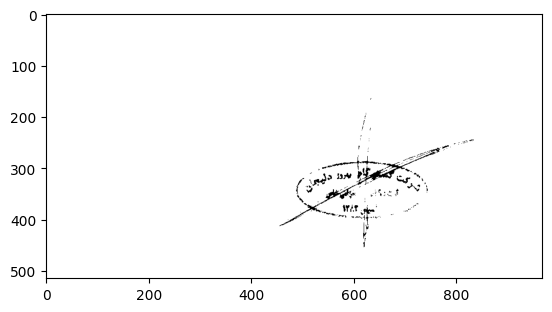

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def make_border(imm, border=10):
    imm[:border, :] = 0
    imm[-border:, :] = 0
    imm[:, :border] = 0
    imm[:, -border:] = 0

def cluster_image(image, thresh, n_clusters=7):
    pixel_colors = image[thresh == 0, ...] / 255
    pixel_locs = (np.argwhere(thresh == 0) / thresh.shape[:2]) - 0.5
    pixels = np.hstack((pixel_colors, pixel_locs / 200))  # color is 2 times more important than location
    pixels = pixels.reshape(-1, pixels.shape[-1])
    clt = KMeans(n_clusters=n_clusters)  # AgglomerativeClustering(n_clusters=n_clusters) # DBSCAN(n_jobs=-1)
    clt.fit(pixels)
    result = []
    for lab in np.unique(clt.labels_):
        clust = np.ones(shape=image.shape[:2]) * 255
        clust[thresh == 0] = (clt.labels_ != lab) * 255
        result.append(clust.astype(np.uint8))
    return result

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    print('Gray', gray.shape)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # Split image into background and object using Otsu’s Binarization
    threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if threshold_value < 200:
        threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    print('Thresh', threshold_value)
    plt.imshow(thresh, cmap='gray')
    plt.show()

    # Cluster the image
    clusters = cluster_image(cv2.cvtColor(image, cv2.COLOR_RGB2LAB), thresh, n_clusters=7)
    print(len(clusters))

    for i, c in enumerate(clusters):
        print((c == 0).sum())
        plt.imshow(c, cmap='gray')
        plt.show()

        # Process selected cluster
        if i == 3:
            # Edge detection
            edged = cv2.Canny(c, 10, 250)
            make_border(edged)
            print('Edged')
            plt.imshow(edged, cmap='gray')
            plt.show()

            # Dilation
            kernel_size = max(image.shape) // 50
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
            dilation = cv2.dilate(edged, kernel, iterations=1)
            make_border(dilation)
            print('Dilated')
            plt.imshow(dilation, cmap='gray')
            plt.show()

            # Closing
            closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
            make_border(closing)
            print('Closed')
            plt.imshow(closing, cmap='gray')
            plt.show()

            # Create a mask from the cluster
            mask = closing == 0

            # Apply the mask to the original image
            final_image = image.copy()
            final_image[mask] = [255, 255, 255]  # Set background color to white

            print('Final Image')
            plt.imshow(final_image)
            plt.show()

# Run the process on an image file
process_image('/content/check.JPEG')


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import glob
import json
import os

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

(426, 800, 3)


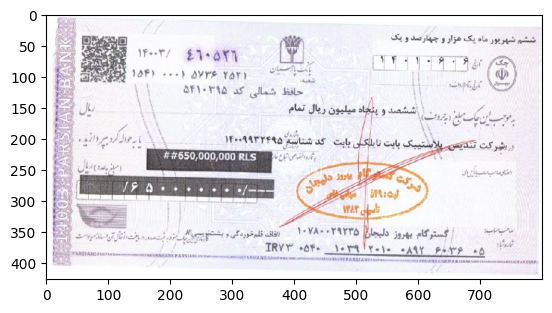

In [2]:
fname = '/content/check.JPEG' # 'sample1/1260637b.jpg' # 'sample1/1019060b.jpg' # 'process.png' #
image = cv2.imread(fname)
if max(image.shape[:2]) > 800:
    scale = 800 / max(image.shape[:2])
    image = cv2.resize(image, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)
print(image.shape)
plt.imshow(image)
#plt.imsave('ttt.png', image)

# RoI

Gray (426, 800)


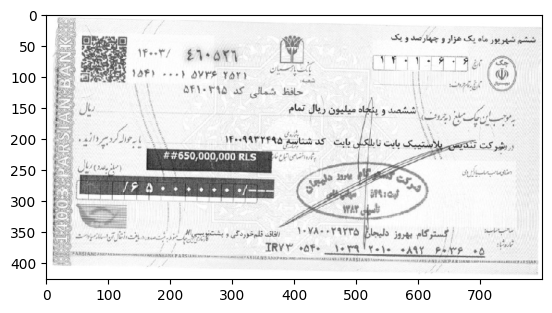

Thresh 200.0


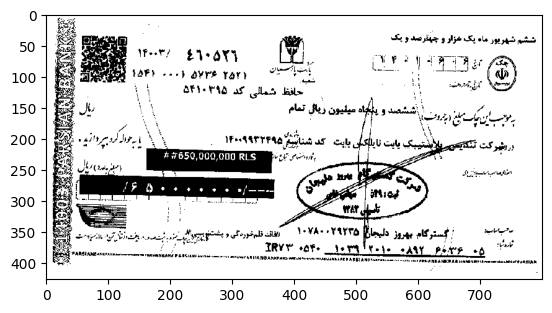

ValueError: not enough values to unpack (expected 3, got 2)

In [15]:
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print('Gray', gray.shape)
plt.imshow(gray, cmap='gray')
plt.show()

#split image into background and object using Otsu’s Binarization
threshold_value,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
if threshold_value < 200:
    threshold_value,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
print('Thresh', threshold_value)
plt.imshow(thresh, cmap='gray')
plt.show()

def make_border(imm, border = 10):
    imm[:border, :] = 0
    imm[-border:, :] = 0
    imm[:, :border:] = 0
    imm[:, -border:] = 0

ctrs = []
sel_i = 3
for i, cluster in enumerate(clusters):
    edged = cv2.Canny(cluster, 10, 250)
    make_border(edged)
    if i == sel_i:
        print('Edged',)
        plt.imshow(edged, cmap='gray')
        plt.show()

    kernel_size = max(image.shape) // 50
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    dilation = cv2.dilate(edged, kernel, iterations=1)
    make_border(dilation)
    if i == sel_i:
        print('Dilated')
        plt.imshow(dilation, cmap='gray')
        plt.show()

    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    make_border(closing)
    if i == sel_i:
        print('Closed')
        plt.imshow(closing, cmap='gray')
        plt.show()

    (image_cntr, ctrs_i, hiers) = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
    ctrs.extend(ctrs_i)
len(ctrs)

255 0


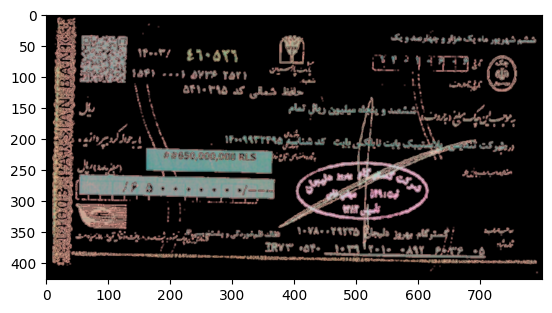

In [4]:
def blur_image(image, thresh):
    inv_thresh = np.tile((thresh == 0), reps=(3,1,1)).T.astype(np.uint8)
    inv_thresh = np.swapaxes(inv_thresh, 0, 1)
    im_copy = cv2.cvtColor(image, cv2.COLOR_RGB2LAB) # image.copy()
    im_copy[inv_thresh == 0] = 0
    blurred_image = cv2.blur(im_copy, (3,3)) # cv2.medianBlur(im_copy, 3)    #   #.GaussianBlur(im_copy, (3, 3), 0, 0)
    blurred_mask = cv2.blur(inv_thresh, (3,3)) # cv2.medianBlur(inv_thresh, 3)    #   #.GaussianBlur(inv_thresh, (3, 3), 0, 0)
    result = blurred_image / (blurred_mask + 1)
    result = (result / result.max() * 255).astype(np.uint8)
    return result
result = blur_image(image, thresh)
print(result.max(), result.min())
plt.imshow(result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7
6913


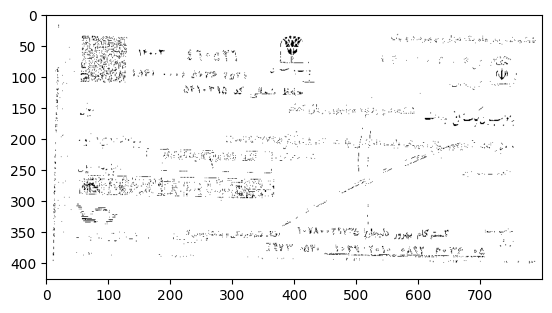

11137


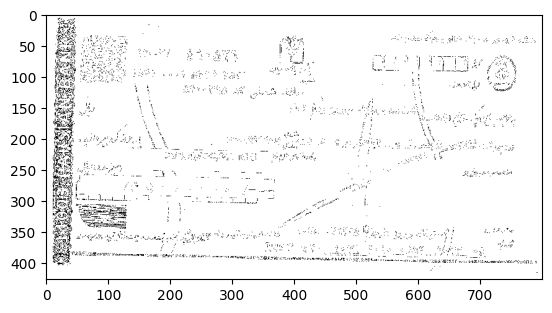

7485


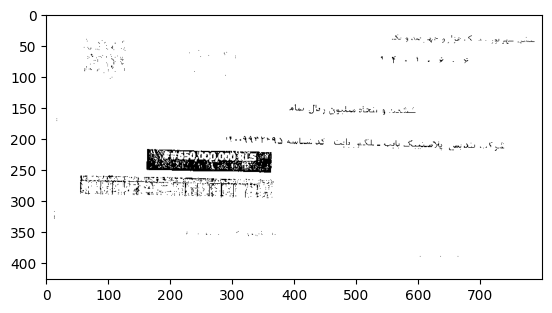

3241


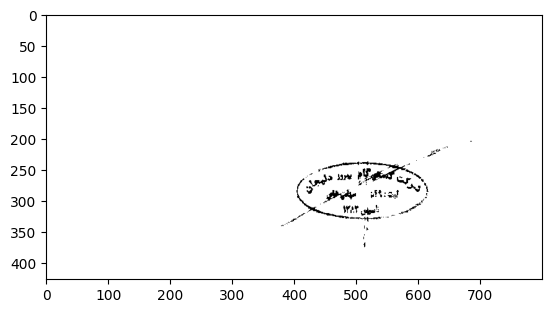

11507


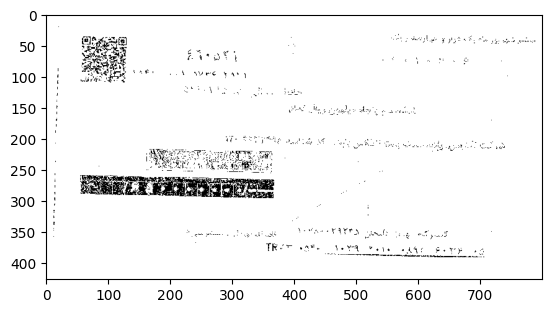

8236


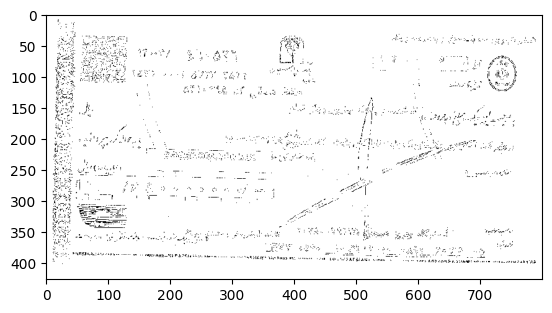

2153


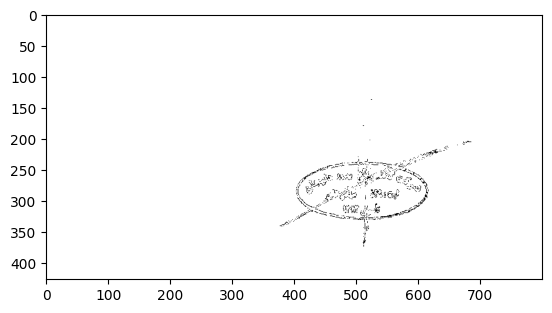

In [16]:
def cluster_image(image, thresh, n_clusters=7):
    pixel_colors = image[thresh == 0, ...] / 255
    pixel_locs = (np.argwhere(thresh == 0) / thresh.shape[:2]) - 0.5
    pixels = np.hstack((pixel_colors, pixel_locs / 200)) # color is 2 times more important than location
    pixels = pixels.reshape(-1, pixels.shape[-1])
    clt =  KMeans(n_clusters = n_clusters) # AgglomerativeClustering(n_clusters=n_clusters) #   DBSCAN(n_jobs=-1) #
    clt.fit(pixels)
    result = []
    for lab in np.unique(clt.labels_):
        clust = np.ones(shape=image.shape[:2]) * 255
        clust[thresh == 0] = (clt.labels_ != lab) * 255
        result.append(clust.astype(np.uint8))
    return result
#clusters = cluster_image(cv2.cvtColor(image, cv2.COLOR_RGB2LAB), thresh, n_clusters=7)
clusters = cluster_image(result , thresh, n_clusters=7)
print(len(clusters))
for c in clusters:
    print((c==0).sum())
    plt.imshow(c, cmap='gray')
    plt.show()

## Textrue based stamp remover using OCR

In [ ]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!pip install pytesseract


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pytesseract

def make_border(imm, border=10):
    imm[:border, :] = 0
    imm[-border:, :] = 0
    imm[:, :border] = 0
    imm[:, -border:] = 0

def cluster_image(image, thresh, n_clusters=7):
    pixel_colors = image[thresh == 0, ...] / 255
    pixel_locs = (np.argwhere(thresh == 0) / thresh.shape[:2]) - 0.5
    pixels = np.hstack((pixel_colors, pixel_locs / 200))  # color is 2 times more important than location
    pixels = pixels.reshape(-1, pixels.shape[-1])
    clt = KMeans(n_clusters=n_clusters)  # AgglomerativeClustering(n_clusters=n_clusters) # DBSCAN(n_jobs=-1)
    clt.fit(pixels)
    result = []
    for lab in np.unique(clt.labels_):
        clust = np.ones(shape=image.shape[:2]) * 255
        clust[thresh == 0] = (clt.labels_ != lab) * 255
        result.append(clust.astype(np.uint8))
    return result

def get_text_mask(image):
    # Perform OCR to get text bounding boxes
    d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['level'])
    mask = np.ones(image.shape[:2], dtype=np.uint8) * 255  # start with a white mask

    for i in range(n_boxes):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        mask[y:y+h, x:x+w] = 0  # set the region of text to black in the mask

    return mask

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    print('Gray', gray.shape)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # Split image into background and object using Otsu’s Binarization
    threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if threshold_value < 200:
        threshold_value, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    print('Thresh', threshold_value)
    plt.imshow(thresh, cmap='gray')
    plt.show()

    # Get text mask to protect text regions
    text_mask = get_text_mask(image)

    # Cluster the image
    clusters = cluster_image(cv2.cvtColor(image, cv2.COLOR_RGB2LAB), thresh, n_clusters=7)
    print(len(clusters))

    for i, c in enumerate(clusters):
        print((c == 0).sum())
        plt.imshow(c, cmap='gray')
        plt.show()

        # Process selected cluster
        if i == 3:
            # Edge detection
            edged = cv2.Canny(c, 10, 250)
            make_border(edged)
            print('Edged')
            plt.imshow(edged, cmap='gray')
            plt.show()

            # Dilation
            kernel_size = max(image.shape) // 50
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
            dilation = cv2.dilate(edged, kernel, iterations=1)
            make_border(dilation)
            print('Dilated')
            plt.imshow(dilation, cmap='gray')
            plt.show()

            # Closing
            closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
            make_border(closing)
            print('Closed')
            plt.imshow(closing, cmap='gray')
            plt.show()

            # Create a mask from the cluster and combine with text mask
            mask = (closing == 0) & (text_mask != 0)

            # Apply the mask to the original image
            final_image = image.copy()
            final_image[mask] = [255, 255, 255]  # Set background color to white

            print('Final Image')
            plt.imshow(final_image)
            plt.show()

# Run the process on an image file
process_image('/content/check.JPEG')
